In [170]:
import pandas as pd

df_fest = pd.read_csv('./festival.csv', sep=';')
df_parkings = pd.read_csv('./parkings.csv', sep=';')
df_parking_velo = pd.read_csv('./parking_velo.csv', sep=';')

In [171]:
import pyspark.pandas as ps

df = pd.read_json("/Users/ilyagridin/Desktop/show.json")

In [172]:
from ipywidgets import widgets

data = ["performance", "indiscipline", "spectacle", "théatre", "dance", "installation photographique"]
checkboxes = [widgets.Checkbox(value=False, description=label) for label in data]
output = widgets.VBox(children=checkboxes)
display(output)

In [178]:
filter_cat = []

for i in checkboxes:
    if(i.value == True):
        filter_cat.append(i.description)



In [179]:
df[df['type'].isin(filter_cat)]

,id_show,title,type,artist,price,nombre_de_place,id_location
0,202703,De l'armure aux gilets,performance,"[Samuel Acha, Clothilde Bourget, Arianne Guernon]",10,180,123456
1,475302,Anima,indiscipline,"[Sofia Jupiter, Michel Matthieu]",20,200,234567
2,123456,Dans ce jardin qu'on aimait,spectacle,"[Tamara Azai, Franck Robert, Anaïs Mahe, Océan...",25,300,345678
3,789012,Le Petit Chaperon Rouge,théatre,"[Mellina boutra, Hélène Perrot, Franck Marecha...",25,300,456789
8,333333,Le nid de cendres,théatre,"[Soukaina Hajj, Hanane Alij, Sophie Linsmaux, ...",25,300,901234
9,444444,Le septième jour,théatre,"[Henri Julien, Stéphane Bertrand, Olivier Pasc...",25,300,12345


In [180]:
df['price'] = pd.to_numeric(df['price'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_show          10 non-null     int64 
 1   title            10 non-null     object
 2   type             10 non-null     object
 3   artist           10 non-null     object
 4   price            10 non-null     int64 
 5   nombre_de_place  10 non-null     int64 
 6   id_location      10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [183]:
import numpy as np
from itertools import combinations


price_list = list(df['price'].values)

list_combinations = list()
list_combinations += list(combinations(enumerate(price_list), int(input())))
print(list_combinations)

9
[((0, 10), (1, 20), (2, 25), (3, 25), (4, 20), (5, 20), (6, 25), (7, 10), (8, 25)), ((0, 10), (1, 20), (2, 25), (3, 25), (4, 20), (5, 20), (6, 25), (7, 10), (9, 25)), ((0, 10), (1, 20), (2, 25), (3, 25), (4, 20), (5, 20), (6, 25), (8, 25), (9, 25)), ((0, 10), (1, 20), (2, 25), (3, 25), (4, 20), (5, 20), (7, 10), (8, 25), (9, 25)), ((0, 10), (1, 20), (2, 25), (3, 25), (4, 20), (6, 25), (7, 10), (8, 25), (9, 25)), ((0, 10), (1, 20), (2, 25), (3, 25), (5, 20), (6, 25), (7, 10), (8, 25), (9, 25)), ((0, 10), (1, 20), (2, 25), (4, 20), (5, 20), (6, 25), (7, 10), (8, 25), (9, 25)), ((0, 10), (1, 20), (3, 25), (4, 20), (5, 20), (6, 25), (7, 10), (8, 25), (9, 25)), ((0, 10), (2, 25), (3, 25), (4, 20), (5, 20), (6, 25), (7, 10), (8, 25), (9, 25)), ((1, 20), (2, 25), (3, 25), (4, 20), (5, 20), (6, 25), (7, 10), (8, 25), (9, 25))]


In [185]:
import osmnx as ox
from osmnx import folium, distance
import networkx as nx

graph_area = ("Avignon, France")
G = ox.graph_from_place(graph_area, network_type='drive')
ox.save_graphml(G, "Avignon.graphml")

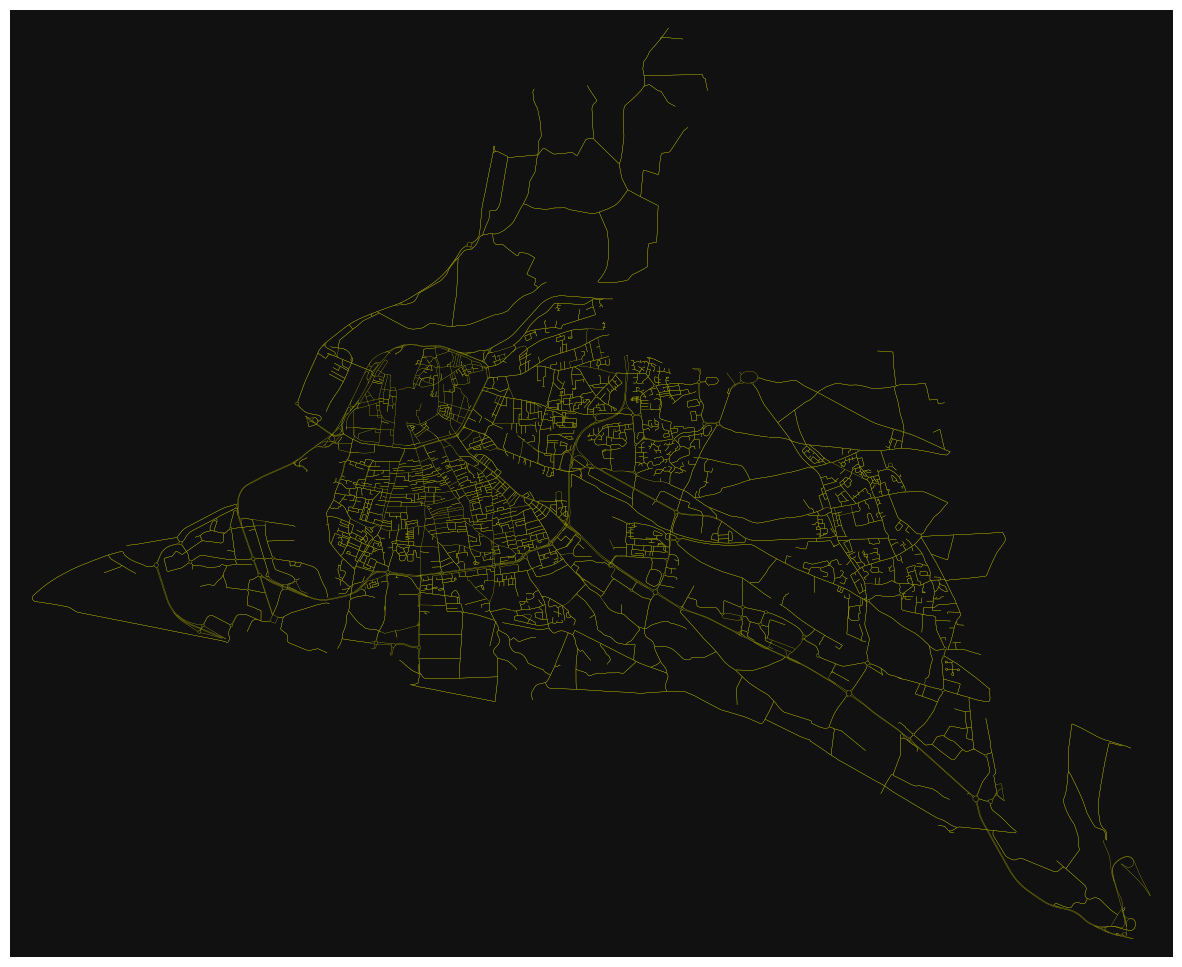

In [186]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
fig, ax = ox.plot_graph(G, figsize=(15, 15), node_size=0, edge_color='y', edge_linewidth=0.2)

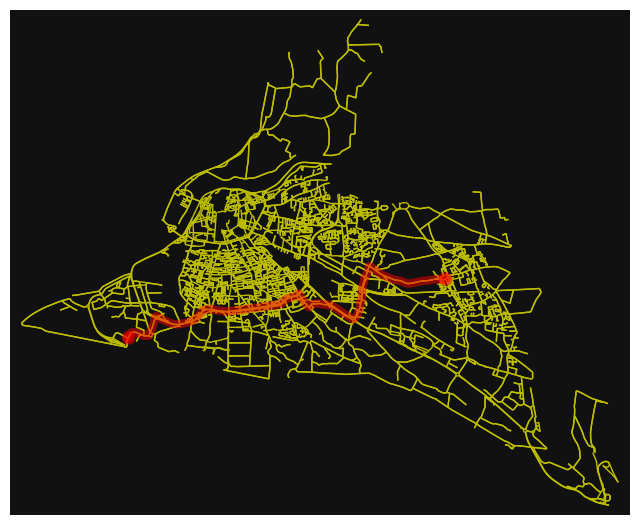

In [187]:
origin_coordinates = (4.871105, 43.934909)
destination_coordinates = (4.781975, 43.922568)
origin_node = distance.nearest_nodes(G, origin_coordinates[0], origin_coordinates[1])
destination_node = distance.nearest_nodes(G, destination_coordinates[0], destination_coordinates[1])
shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, edge_color='y', route_color='r', route_linewidth=6, node_size=0)

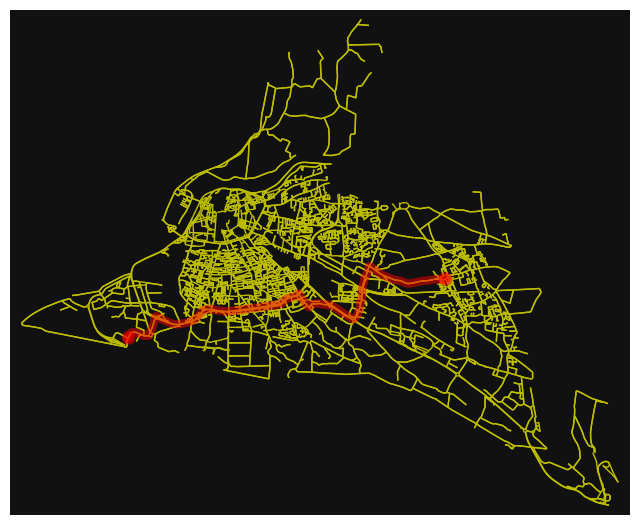

In [188]:
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='length')
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, edge_color='y', route_color='r', route_linewidth=6, node_size=0)

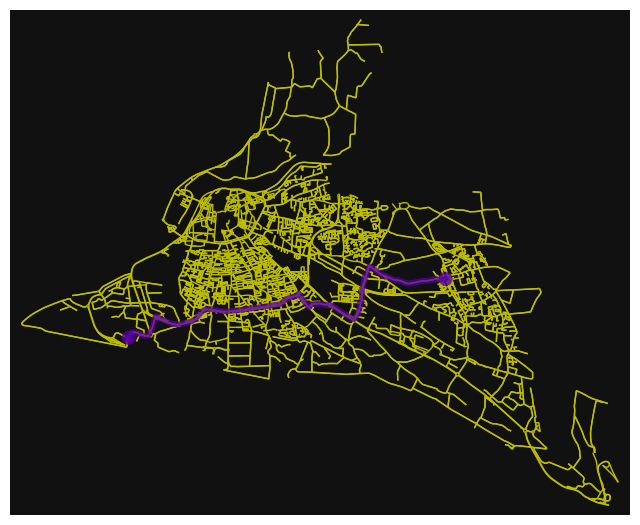

In [189]:
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], edge_color='y', route_colors=['r', 'b'], route_linewidth=6, node_size=0)

In [190]:
from datetime import timedelta

travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print(travel_time_in_hours_minutes_seconds)

0:11:32


In [191]:
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
distance_in_kilometers = distance_in_meters / 1000
print(distance_in_kilometers)

9.373446999999997
